# Deep learning for ecology and evolution tutorial

This tutorial is a supplement to the manuscript "Deep learning as a tool for ecology and evolution" by Marek L. Borowiec, Rebecca B. Dikow, Paul B. Frandsen, Alexander McKeeken, Gabriele Valentini, and Alexander E. White.

This tutorial uses Google Colab, an interactive computating enviroment or "notebook". It is designed for users familiar with basics of Unix shell environment and Python scripting. You should make a copy by choosing File > Save a copy from the menu before running it.

You can modify any of the code or run the individual code cells as they are. You can also run the entire notebook by selecting Runtime > Run all from the menu. 

# Example 1: *Iris* identification based on flower measurements

![](https://drive.google.com/uc?export=view&id=1TYyZjElOfc2GIrg-xIJk_fwCaRlzEIB4)

In this example we will use a small dataset comprising measurements of flower parts for three species of iris. This dataset is conveniently available through one of the commonly used machine learning Python libraries, [Scikit-Learn](https://scikit-learn.org/).

In [ ]:
# Import Scikit-Learn example datasets
from sklearn import datasets

# Load dataset
iris = datasets.load_iris()
# Get dataset information
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The above gives you most of what you need to know about the data. There are four measurements for each flower: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm. The measurements are stored as a NumPy array (2-dimensional tensor) in the 'data' attribute. The species identification in the 'target' attribute with 0 corresponding to *Iris setosa*, 1 to *I. versicolor*, and 2 to *I. virginica*. 

In [ ]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [ ]:
X = iris.data
y = iris.target

We can plot some of the measurements to explore the data:

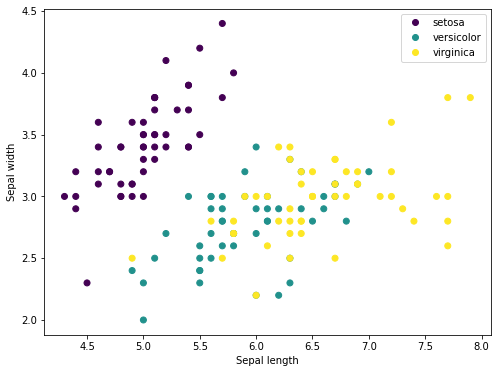

In [ ]:
import matplotlib.pyplot as plt

# Plot sepal length against sepal width for the three species
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
scatter = ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
handles, labels = scatter.legend_elements()
ax.legend(handles, ['setosa', 'versicolor', 'virginica'])

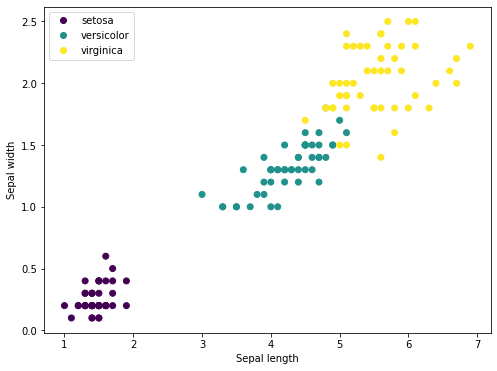

In [ ]:
# Plot petal length against sepal width for the three species
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
scatter = ax.scatter(X[:, 2], X[:, 3], c=y)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
handles, labels = scatter.legend_elements()
ax.legend(handles, ['setosa', 'versicolor', 'virginica'])

The above shows that sepal width/sepal length index is a good measure that will discriminatethe species well except for a slight overlap between *versicolor* and *virginica*.

This is a sign that using deep learning for this very small dataset is likely not the best solution. Best practices for machine learning are beyond the scope of this tutorial, but a proper treatment would include data cleaning (making sure all input is expressed in the same units, there are no missing values, etc.), exploration of realtionships among variables, establishing baseline performance (this case is easy, random guess gives accuracy of 33%), and performance comparison among various machine learning and other approaches.

Here we will skip these steps and build a simple neural network using the [Keras](https://keras.io/) interface from Google's open source [TensorFlow](https://www.tensorflow.org/) library.

A common practice in machine learning is to [one-hot encode](https://en.wikipedia.org/wiki/One-hot) your class labels. This is easily done with a Keras helper function we can just import:

In [ ]:
from tensorflow.keras.utils import to_categorical
# One hot encode labels
y_one_hot = to_categorical(y)

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
y_one_hot[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

Another common practice is to scale your input variables. It is especially important if your input variables are in different units and have different scales (mean, standard deviation). Two most common techniques include [normalization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), which scales variables from 0 to 1, and [standardization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), which scales variables to values with a mean of 0 and standard deviation of 1. Both can be accomplished using functions in Scikit-Learn and here we will use standardization.  

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create scaler
scaler = StandardScaler()
# Fit and transform in one step
standardized = scaler.fit_transform(X)

In [ ]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
standardized[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In order to train a neural network using supervised learning we will need our variables (measurements) and corresponding ground truth data (species identifications/labels). We should confirm our inputs have the right shapes:

In [ ]:
standardized.shape

(150, 4)

In [ ]:
y_one_hot.shape

(150, 3)

Supervised learning requires we have a portion of our dataset used in algorithm training, as well as a set of data that is not used directly and against which performance will be compared. Here we use another Scikit-Learn function to divide our measurements into sets of training data and labels (70% of all data or data from 120 flowers, 40 per species) and validation (30% or data from 45 flowers, 15 per species). 

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data 
# (uppercase X and lowercase y often represent data and labels in machine learning code)
X_train, X_valid, y_train, y_valid = train_test_split(standardized, y_one_hot, test_size=0.3, shuffle=True)

We are now ready to define our neural network classifier architecture and training parameters.

In [ ]:
# Imports necessary for our simple network
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

def train_classifier(
    train_data, 
    validate_data, 
    train_labels, 
    validate_labels, 
    epochs, 
    batch_size
    ):
    # First we instantiate the Keras input object with tensor shape of 4, one for each input variable/measurement.
    inputs = Input(shape=(4))
    # We then add two hidden layers, one with 2 and the other with 3 neurons
    # and provide an activation function, in this case the rectified linear activation function.
    # Note that the first hidden layer builds upon inputs and the second one is attached to the network object 'x'
    # from the previous layer.
    x = Dense(2, activation='relu')(inputs)
    x = Dense(3, activation='relu')(x)
    # Finally, we add the output layer, which will have 3 neurons, equal to our data classes.
    # The output layer also needs a different activation function, which in this case is the sigmoid.
    # The sigmoid function here will output three numbers from 0 to 1, one for each class corresponding to class probabilities.
    outputs = Dense(3, activation='softmax')(x)
    # Next we set up model compilation that uses categorical crossentropy as the loss function,
    # and optimizes network parameters using the Adam algorithm, printing accuracy at the end of each epoch 
    model = Model(inputs, outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Because classifier performance eventually plateau during training or even deteriorate,
    # we should set up basic rules for saving the best classifier.
    # Here we define an early stopping rule that will cut training short if validation loss doesn't improve more than 0.001 over 50 epochs
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=50, verbose=1, mode='auto')
    # We also save our trained classifier every time validation loss improves over previous iterations.
    checkpoints = ModelCheckpoint('best_classifier', monitor='val_loss', verbose=1,
                              save_best_only=True, save_weights_only=False, mode='auto')
    # We can also print our network's summary before training
    model.summary()
    # Finally, we call the fit method that will perform the training.
    model.fit(
        train_data, train_labels,
        validation_data=(validate_data, validate_labels),
        epochs=epochs, 
        verbose=1,
        callbacks=[early_stopping, checkpoints]
        )
    # We should save our classifier object in case we would like to obtain training history, for example.
    return model

Your simple dense neural network architecture looks like this:

![](https://drive.google.com/uc?export=view&id=1Q8VuihvFctTNE5GRNbNwxT6_s8W3Sd1o)

This function will execute training:

In [ ]:
train_classifier(
    X_train, 
    X_valid, 
    y_train, 
    y_valid, 
    epochs=1000, 
    batch_size=5
    )

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/4 [======>.......................] - ETA: 3s - loss: 1.0839 - accuracy: 0.3438
Epoch 1: val_loss improved from inf to 1.08513, saving model to best_classifier
4/4 [==================

Depending on how your training and validation sets have been split, you may see that both training and validation accuracy reach between 95-98%. Alternatively, you may see that the validation accuracy reaches 100%, meaning the network is able to correctly classify all validation set measurements to species while the training accuracy is slightly lower and training loss a bit higher than loss for the validation set. This could indicate that your network is overfitting to the validation set. This can be remedied by a number of means which are beyond the scope of this tutorial. The [Keras book](https://www.manning.com/books/deep-learning-with-python-second-edition) is a good starting point and there are many on-line resources on this subject.

To see how the train/validation split this affects your classifier accuracy you can perform [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) which involves several  rounds of training with different training and validation sets.

Neural network training is almost always an iterative process and as you are experimenting with various network architectures and other parameters you are also running risk of overfitting to your validation set. It is therefore common to also set aside set of data called the test set. You would use the test set only once when you are satisfied with your training and validation performance to obtain a less biased measure of performance.

# Example 2: Identification of jays from images

![](https://drive.google.com/uc?export=view&id=1FUgRQmv71M9V9P-jMSfZwKieunvIkTKj)

Identification of irises from measurement data was a task for which deep learning is not necessary as [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) or even a simple measurement index would suffice. Classification of images, however, is a complex task in which deep learning excels.

In this example we will use a small dataset of images of three species of North American jays: blue jay, California scrub jay, and Steller's jay. These are related but somewhat distinct in appearance. We will be using images from [iNaturalist](https://www.inaturalist.org/), obtained through [GBIF](https://www.gbif.org/). These images are licensed under the Creative Commons 
Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. Attributions can be found in the "metadata" file and photographs can be associated using the GBIF ID contained in file names.

Each image has been downsized to be at most 150 pixels wide. First, lets download the images from Google Drive using the "gdown" utility. We then unzip the files and look at the results.

In [ ]:
# Clear workspace
!rm -rf *

In [ ]:
# Download data
!gdown --id 1kxRFsR4ujA5FBorNzEpGYRgqMgFjr2o9

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1kxRFsR4ujA5FBorNzEpGYRgqMgFjr2o9
To: /content/jays-reduced.zip
100% 7.28M/7.28M [00:00<00:00, 24.3MB/s]


In [ ]:
# List contents of working directory
!ls

jays-reduced.zip


In [ ]:
# Unzip images
!unzip jays-reduced.zip

Archive:  jays-reduced.zip
   creating: blue/
  inflating: blue/blue-2251971533.jpg  
  inflating: blue/blue-2802846611.jpg  
  inflating: blue/blue-3032103394.jpg  
  inflating: blue/blue-3044580256.jpg  
  inflating: blue/blue-2273294075.jpg  
  inflating: blue/blue-3005241712.jpg  
  inflating: blue/blue-2626408770.jpg  
  inflating: blue/blue-3039306714.jpg  
  inflating: blue/blue-3044730397.jpg  
  inflating: blue/blue-2626465412.jpg  
  inflating: blue/blue-2283281434.jpg  
  inflating: blue/blue-3013857976.jpg  
  inflating: blue/blue-3044651458.jpg  
  inflating: blue/blue-3039507589.jpg  
  inflating: blue/blue-2803166968.jpg  
  inflating: blue/blue-2898263295.jpg  
  inflating: blue/blue-2818573161.jpg  
  inflating: blue/blue-3044909306.jpg  
  inflating: blue/blue-2868338810.jpg  
  inflating: blue/blue-2814418419.jpg  
  inflating: blue/blue-2331876774.jpg  
  inflating: blue/blue-2988472002.jpg  
  inflating: blue/blue-2423064405.jpg  
  inflating: blue/blue-3031709512.

In [ ]:
# List working directory contents again 
!ls

blue  jays-reduced.zip	scrub  stellers


In [ ]:
# Remove the zipped data directory
!rm jays-reduced.zip

In [ ]:
# Count images in the blue jay folder
!ls blue | wc -l

500


In [ ]:
# Count images in the scrub jay folder
!ls scrub | wc -l

500


In [ ]:
# Count images in the Steller's jay folder
!ls stellers | wc -l

500


We see that we have 500 images for each species. In the previous example we used a Scikit-Learn function to divide our dataset into training and validation sets. Here, we will split the data into different directories. This is to take advantage of built-in Keras functionality that can take in data without loading it all into computer memory at once, a very important feature when dealing with large datasets. 

In [ ]:
import random
from pathlib import Path

def make_validation_data(train_dir, validation_dir, proportion):
    """
    Make a representative validation set from each category.
    This function takes names of training and validation directories,
    the training one containing subdirectories corresponding to data classes,
    each with images/data points for that class.
    It then creates validation subdirectories as needed and randomly
    transfers a proportion of files from each training subdirectory.  
    """
    # Check if validation/test directory exists and create as needed
    if not Path(validation_dir).exists():
        Path(validation_dir).mkdir()
    # List classes based on subdirectories in the training directory
    classes = [dname for dname in Path(train_dir).iterdir() if dname.is_dir()]
    # Print the names of classes as a sanity check
    for dname in classes:
      print(dname.stem)
    for dname in classes:
        # Create a list of files in each training subdirectory
        file_list = [fname for fname in dname.iterdir() 
                      if fname.is_file()]
        # Create path name to validation/test directory
        val_class_dir = Path(validation_dir).joinpath(dname.stem)
        # Create class subdirectories in validation/test directory
        if not val_class_dir.exists():
          Path(val_class_dir).mkdir()
        # Determine number of images to transfer for each class
        no_for_val = round(float(len(file_list)) * proportion)
        # Move files from training to validation
        for fname in random.sample(file_list, no_for_val):
            src = fname
            dest = Path(val_class_dir).joinpath(fname.name)
            src.rename(dest)

In [ ]:
# Make directories for training and validation data
!mkdir train validate

In [ ]:
# Move directories corresponding to our three classes
!mv blue scrub stellers train

In [ ]:
TRAIN_DIR = 'train/'
VALIDATION_DIR = 'validate/'

In [ ]:
# Create training and validation directories/subdirectories
make_validation_data(TRAIN_DIR, VALIDATION_DIR, 0.2)

blue
scrub
stellers


In [ ]:
# Confirm we are left with the expected number of training examples
!ls  train/scrub | wc -l

400


We can now prepare our images for training. We will use Keras's `image_from_directory` function: 

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(150, 150), # Each image has to have the same size for neural network training 
    label_mode='categorical', # This will be your choice for more than two classes in identfication or classification problems
    batch_size=32) # Batch size determined the number of images used in training before neural network parameters are updated

Found 1200 files belonging to 3 classes.


In [ ]:
# We do the same for our validation directory
validation_dataset = image_dataset_from_directory(
    VALIDATION_DIR,
    image_size=(150, 150),
    label_mode='categorical',
    batch_size=32)

Found 300 files belonging to 3 classes.


In [ ]:
# Batches of data are returned in arrays
# We can see what shape these arrays are
# For 'data', or images, we see there are
# 32 in each batch, each image 150 pixels high and wide,
# with one point for each of the RGB channels (https://en.wikipedia.org/wiki/Channel_(digital_image))
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 3)


Now we will create a simple neural network architecture incorporating convolutional layers using the Keras interface. In addition, we will use data augmentation to increase amount of data available for training and dropout to combat overfitting.

Augmentation in this context means applying modifications such as rotation, zoom, and image flipping before passing training data through neural network. This way the network never sees two identical images and learns the important features without considering posture, for example.

Dropout is a type of neural network layer that masks a certain proportion of outputs from the preceding layer. In our case it will be positioned between the last convolutional layer and densely-connected output layer. Dropout ensures that the classifier never sees the entirety of training data, making it less likely to be too precisely attuned to peculiarities of the training data.

In [ ]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input, layers, Model

# Data augmentation with horizontal flipping, rotation, and zooming
data_augmentation = Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.5),
    ]
)

Now that we have the augmentation function, let's take a look at some example images from our data:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


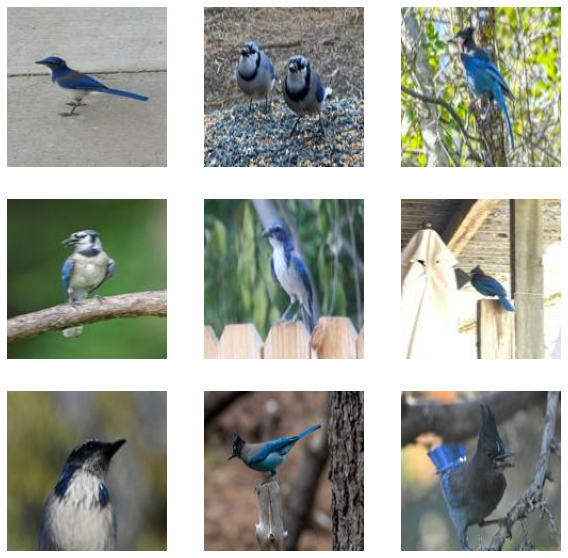

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# We take nine images at random from our training
# set and plot them in a 3 x 3 grid 
for images, _ in train_dataset.take(9):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

Now let's take a look at how one image can be modified by augmentation:

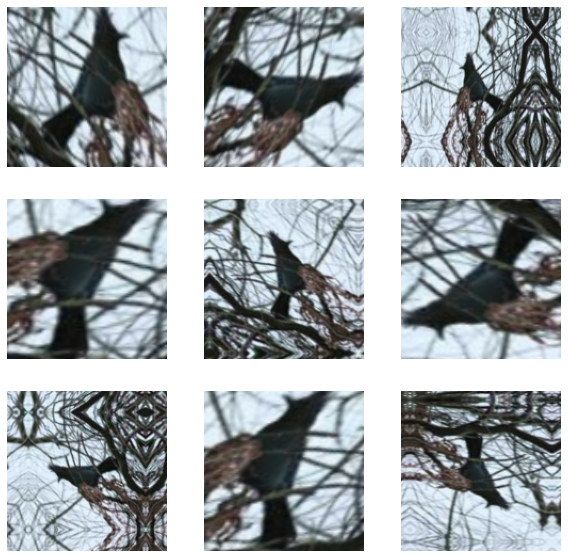

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Finally, we can define our neural network architecture:

In [ ]:
# We initialize the network inputs with shape of individual image arrays
inputs = Input(shape=(150, 150, 3))

x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)         # We rescale each RGB value ranging from 0 to 255 to values between 0 and 1. 
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x) # First convolutional layer with kernel size 3 and 32 filters
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)     # The flatten layer compis used to compress multidimensional data to a 1-dimensional array,
                            # such that it can be used in a dense layer
x = layers.Dropout(0.5)(x)  # The dropout layer filtering out half of data coming into the last layer during training
outputs = layers.Dense(3, activation='softmax')(x) # Final densely-connected layer with three neurons and softmax activations
model = Model(inputs=inputs, outputs=outputs)

# We can print our classifier structure
model.summary()

# Compile before running
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Classification accuracy and loss on the validation set can fluctuate and even decrease if we train for too long. Keras allows us to define some rules for saving only the best classifier. We will use `callbacks` to checkpoint the classifier whenever it improves in validation loss. 

We can also define an early stopping rule to avoid wasting compute resources once training is no longer improving the classifier.

This training session will 

In [ ]:
from tensorflow.keras import callbacks

callbacks = [
             callbacks.ModelCheckpoint(
                 filepath='best_classifier', # This allows us to restart
                 save_best_only=True, # Save only best classifier according to
                 monitor='val_loss',  # Validation loss criterion
                 verbose=1, 
                 mode='auto'),
             callbacks.EarlyStopping(
                 monitor='val_loss',  # If validation loss does not improve
                 min_delta=0.001,     # more than 0.001,
                 patience=10)         # for ten epochs, terminate training
             ]

In [42]:
history = model.fit(
  train_dataset,
  epochs=100,
  validation_data=validation_dataset,
  callbacks=callbacks)

Epoch 1/100
38/38 [==============================] - ETA: 0s - loss: 0.7616 - accuracy: 0.6650
Epoch 1: val_loss did not improve from 0.70373
38/38 [==============================] - 73s 2s/step - loss: 0.7616 - accuracy: 0.6650 - val_loss: 0.7272 - val_accuracy: 0.6667
Epoch 2/100
38/38 [==============================] - ETA: 0s - loss: 0.7604 - accuracy: 0.6525
Epoch 2: val_loss improved from 0.70373 to 0.67555, saving model to best_classifier


38/38 [==============================] - 73s 2s/step - loss: 0.7604 - accuracy: 0.6525 - val_loss: 0.6756 - val_accuracy: 0.6900
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 0.7459 - accuracy: 0.6650
Epoch 3: val_loss did not improve from 0.67555
38/38 [==============================] - 71s 2s/step - loss: 0.7459 - accuracy: 0.6650 - val_loss: 0.6946 - val_accuracy: 0.6767
Epoch 4/100
38/38 [==============================] - ETA: 0s - loss: 0.7244 - accuracy: 0.6683
Epoch 4: val_loss improved from 0.67555 to 0.65610, saving model to best_classifier


38/38 [==============================] - 73s 2s/step - loss: 0.7244 - accuracy: 0.6683 - val_loss: 0.6561 - val_accuracy: 0.6967
Epoch 5/100
38/38 [==============================] - ETA: 0s - loss: 0.7395 - accuracy: 0.6667
Epoch 5: val_loss improved from 0.65610 to 0.64197, saving model to best_classifier


38/38 [==============================] - 72s 2s/step - loss: 0.7395 - accuracy: 0.6667 - val_loss: 0.6420 - val_accuracy: 0.7133
Epoch 6/100
38/38 [==============================] - ETA: 0s - loss: 0.7178 - accuracy: 0.6817
Epoch 6: val_loss did not improve from 0.64197
38/38 [==============================] - 71s 2s/step - loss: 0.7178 - accuracy: 0.6817 - val_loss: 0.6996 - val_accuracy: 0.6900
Epoch 7/100
38/38 [==============================] - ETA: 0s - loss: 0.7362 - accuracy: 0.6725
Epoch 7: val_loss did not improve from 0.64197
38/38 [==============================] - 70s 2s/step - loss: 0.7362 - accuracy: 0.6725 - val_loss: 0.7253 - val_accuracy: 0.6767
Epoch 8/100
38/38 [==============================] - ETA: 0s - loss: 0.7327 - accuracy: 0.6558
Epoch 8: val_loss did not improve from 0.64197
38/38 [==============================] - 70s 2s/step - loss: 0.7327 - accuracy: 0.6558 - val_loss: 0.6724 - val_accuracy: 0.6900
Epoch 9/100
38/38 [==============================] - ETA: 

38/38 [==============================] - 74s 2s/step - loss: 0.6875 - accuracy: 0.7042 - val_loss: 0.6206 - val_accuracy: 0.7300
Epoch 13/100
38/38 [==============================] - ETA: 0s - loss: 0.7061 - accuracy: 0.6942
Epoch 13: val_loss improved from 0.62056 to 0.60776, saving model to best_classifier


38/38 [==============================] - 73s 2s/step - loss: 0.7061 - accuracy: 0.6942 - val_loss: 0.6078 - val_accuracy: 0.7300
Epoch 14/100
38/38 [==============================] - ETA: 0s - loss: 0.6685 - accuracy: 0.7192
Epoch 14: val_loss did not improve from 0.60776
38/38 [==============================] - 69s 2s/step - loss: 0.6685 - accuracy: 0.7192 - val_loss: 0.6104 - val_accuracy: 0.7200
Epoch 15/100
38/38 [==============================] - ETA: 0s - loss: 0.7058 - accuracy: 0.6925
Epoch 15: val_loss did not improve from 0.60776
38/38 [==============================] - 71s 2s/step - loss: 0.7058 - accuracy: 0.6925 - val_loss: 0.6424 - val_accuracy: 0.7433
Epoch 16/100
38/38 [==============================] - ETA: 0s - loss: 0.7008 - accuracy: 0.6900
Epoch 16: val_loss did not improve from 0.60776
38/38 [==============================] - 69s 2s/step - loss: 0.7008 - accuracy: 0.6900 - val_loss: 0.6122 - val_accuracy: 0.7233
Epoch 17/100
38/38 [==============================] 

38/38 [==============================] - 73s 2s/step - loss: 0.6754 - accuracy: 0.7133 - val_loss: 0.6024 - val_accuracy: 0.7233
Epoch 20/100
38/38 [==============================] - ETA: 0s - loss: 0.6780 - accuracy: 0.6942
Epoch 20: val_loss improved from 0.60243 to 0.58229, saving model to best_classifier


38/38 [==============================] - 73s 2s/step - loss: 0.6780 - accuracy: 0.6942 - val_loss: 0.5823 - val_accuracy: 0.7500
Epoch 21/100
38/38 [==============================] - ETA: 0s - loss: 0.6547 - accuracy: 0.7225
Epoch 21: val_loss did not improve from 0.58229
38/38 [==============================] - 70s 2s/step - loss: 0.6547 - accuracy: 0.7225 - val_loss: 0.6086 - val_accuracy: 0.7167
Epoch 22/100
38/38 [==============================] - ETA: 0s - loss: 0.6742 - accuracy: 0.7067
Epoch 22: val_loss improved from 0.58229 to 0.57542, saving model to best_classifier


38/38 [==============================] - 72s 2s/step - loss: 0.6742 - accuracy: 0.7067 - val_loss: 0.5754 - val_accuracy: 0.7367
Epoch 23/100
38/38 [==============================] - ETA: 0s - loss: 0.6189 - accuracy: 0.7225
Epoch 23: val_loss did not improve from 0.57542
38/38 [==============================] - 69s 2s/step - loss: 0.6189 - accuracy: 0.7225 - val_loss: 0.5919 - val_accuracy: 0.7433
Epoch 24/100
38/38 [==============================] - ETA: 0s - loss: 0.6538 - accuracy: 0.7283
Epoch 24: val_loss did not improve from 0.57542
38/38 [==============================] - 71s 2s/step - loss: 0.6538 - accuracy: 0.7283 - val_loss: 0.6542 - val_accuracy: 0.7000
Epoch 25/100
38/38 [==============================] - ETA: 0s - loss: 0.6268 - accuracy: 0.7258
Epoch 25: val_loss did not improve from 0.57542
38/38 [==============================] - 70s 2s/step - loss: 0.6268 - accuracy: 0.7258 - val_loss: 0.6752 - val_accuracy: 0.7000
Epoch 26/100
38/38 [==============================] 

38/38 [==============================] - 74s 2s/step - loss: 0.6178 - accuracy: 0.7325 - val_loss: 0.5747 - val_accuracy: 0.7867
Epoch 29/100
38/38 [==============================] - ETA: 0s - loss: 0.6137 - accuracy: 0.7517
Epoch 29: val_loss improved from 0.57470 to 0.56042, saving model to best_classifier


38/38 [==============================] - 72s 2s/step - loss: 0.6137 - accuracy: 0.7517 - val_loss: 0.5604 - val_accuracy: 0.7433
Epoch 30/100
38/38 [==============================] - ETA: 0s - loss: 0.6079 - accuracy: 0.7267
Epoch 30: val_loss did not improve from 0.56042
38/38 [==============================] - 69s 2s/step - loss: 0.6079 - accuracy: 0.7267 - val_loss: 0.6458 - val_accuracy: 0.7433
Epoch 31/100
38/38 [==============================] - ETA: 0s - loss: 0.6099 - accuracy: 0.7350
Epoch 31: val_loss did not improve from 0.56042
38/38 [==============================] - 71s 2s/step - loss: 0.6099 - accuracy: 0.7350 - val_loss: 0.6004 - val_accuracy: 0.7300
Epoch 32/100
38/38 [==============================] - ETA: 0s - loss: 0.6285 - accuracy: 0.7233
Epoch 32: val_loss did not improve from 0.56042
38/38 [==============================] - 69s 2s/step - loss: 0.6285 - accuracy: 0.7233 - val_loss: 0.5742 - val_accuracy: 0.7400
Epoch 33/100
38/38 [==============================] 

38/38 [==============================] - 73s 2s/step - loss: 0.6288 - accuracy: 0.7333 - val_loss: 0.5442 - val_accuracy: 0.7667
Epoch 34/100
38/38 [==============================] - ETA: 0s - loss: 0.5951 - accuracy: 0.7400
Epoch 34: val_loss did not improve from 0.54415
38/38 [==============================] - 71s 2s/step - loss: 0.5951 - accuracy: 0.7400 - val_loss: 0.5449 - val_accuracy: 0.7767
Epoch 35/100
38/38 [==============================] - ETA: 0s - loss: 0.5924 - accuracy: 0.7408
Epoch 35: val_loss did not improve from 0.54415
38/38 [==============================] - 69s 2s/step - loss: 0.5924 - accuracy: 0.7408 - val_loss: 0.6266 - val_accuracy: 0.7267
Epoch 36/100
38/38 [==============================] - ETA: 0s - loss: 0.6124 - accuracy: 0.7408
Epoch 36: val_loss did not improve from 0.54415
38/38 [==============================] - 69s 2s/step - loss: 0.6124 - accuracy: 0.7408 - val_loss: 0.5795 - val_accuracy: 0.7333
Epoch 37/100
38/38 [==============================] 

38/38 [==============================] - 72s 2s/step - loss: 0.5644 - accuracy: 0.7600 - val_loss: 0.5356 - val_accuracy: 0.7700
Epoch 43/100
38/38 [==============================] - ETA: 0s - loss: 0.5556 - accuracy: 0.7633
Epoch 43: val_loss did not improve from 0.53559
38/38 [==============================] - 69s 2s/step - loss: 0.5556 - accuracy: 0.7633 - val_loss: 0.5776 - val_accuracy: 0.7667
Epoch 44/100
38/38 [==============================] - ETA: 0s - loss: 0.5707 - accuracy: 0.7717
Epoch 44: val_loss did not improve from 0.53559
38/38 [==============================] - 71s 2s/step - loss: 0.5707 - accuracy: 0.7717 - val_loss: 0.5555 - val_accuracy: 0.7600
Epoch 45/100
38/38 [==============================] - ETA: 0s - loss: 0.5483 - accuracy: 0.7625
Epoch 45: val_loss did not improve from 0.53559
38/38 [==============================] - 69s 2s/step - loss: 0.5483 - accuracy: 0.7625 - val_loss: 0.5407 - val_accuracy: 0.7900
Epoch 46/100
38/38 [==============================] 

38/38 [==============================] - 72s 2s/step - loss: 0.5314 - accuracy: 0.7825 - val_loss: 0.5247 - val_accuracy: 0.7933
Epoch 47/100
38/38 [==============================] - ETA: 0s - loss: 0.5456 - accuracy: 0.7700
Epoch 47: val_loss did not improve from 0.52471
38/38 [==============================] - 71s 2s/step - loss: 0.5456 - accuracy: 0.7700 - val_loss: 0.5727 - val_accuracy: 0.7600
Epoch 48/100
38/38 [==============================] - ETA: 0s - loss: 0.5423 - accuracy: 0.7808
Epoch 48: val_loss improved from 0.52471 to 0.50454, saving model to best_classifier


38/38 [==============================] - 73s 2s/step - loss: 0.5423 - accuracy: 0.7808 - val_loss: 0.5045 - val_accuracy: 0.7633
Epoch 49/100
38/38 [==============================] - ETA: 0s - loss: 0.5687 - accuracy: 0.7625
Epoch 49: val_loss did not improve from 0.50454
38/38 [==============================] - 69s 2s/step - loss: 0.5687 - accuracy: 0.7625 - val_loss: 0.5175 - val_accuracy: 0.7867
Epoch 50/100
38/38 [==============================] - ETA: 0s - loss: 0.5155 - accuracy: 0.7875
Epoch 50: val_loss did not improve from 0.50454
38/38 [==============================] - 71s 2s/step - loss: 0.5155 - accuracy: 0.7875 - val_loss: 0.5379 - val_accuracy: 0.7800
Epoch 51/100
38/38 [==============================] - ETA: 0s - loss: 0.5497 - accuracy: 0.7683
Epoch 51: val_loss did not improve from 0.50454
38/38 [==============================] - 69s 2s/step - loss: 0.5497 - accuracy: 0.7683 - val_loss: 0.5975 - val_accuracy: 0.7500
Epoch 52/100
38/38 [==============================] 

38/38 [==============================] - 72s 2s/step - loss: 0.5469 - accuracy: 0.7617 - val_loss: 0.5016 - val_accuracy: 0.8000
Epoch 55/100
38/38 [==============================] - ETA: 0s - loss: 0.5352 - accuracy: 0.7725
Epoch 55: val_loss did not improve from 0.50160
38/38 [==============================] - 69s 2s/step - loss: 0.5352 - accuracy: 0.7725 - val_loss: 0.5070 - val_accuracy: 0.7900
Epoch 56/100
38/38 [==============================] - ETA: 0s - loss: 0.5560 - accuracy: 0.7650
Epoch 56: val_loss did not improve from 0.50160
38/38 [==============================] - 71s 2s/step - loss: 0.5560 - accuracy: 0.7650 - val_loss: 0.5278 - val_accuracy: 0.7933
Epoch 57/100
38/38 [==============================] - ETA: 0s - loss: 0.5343 - accuracy: 0.7883
Epoch 57: val_loss did not improve from 0.50160
38/38 [==============================] - 70s 2s/step - loss: 0.5343 - accuracy: 0.7883 - val_loss: 0.5187 - val_accuracy: 0.7833
Epoch 58/100
38/38 [==============================] 

38/38 [==============================] - 74s 2s/step - loss: 0.5388 - accuracy: 0.7783 - val_loss: 0.4861 - val_accuracy: 0.8100
Epoch 60/100
38/38 [==============================] - ETA: 0s - loss: 0.5181 - accuracy: 0.7917
Epoch 60: val_loss did not improve from 0.48613
38/38 [==============================] - 69s 2s/step - loss: 0.5181 - accuracy: 0.7917 - val_loss: 0.5188 - val_accuracy: 0.7933
Epoch 61/100
38/38 [==============================] - ETA: 0s - loss: 0.5289 - accuracy: 0.7717
Epoch 61: val_loss did not improve from 0.48613
38/38 [==============================] - 69s 2s/step - loss: 0.5289 - accuracy: 0.7717 - val_loss: 0.5504 - val_accuracy: 0.7667
Epoch 62/100
38/38 [==============================] - ETA: 0s - loss: 0.5258 - accuracy: 0.7792
Epoch 62: val_loss did not improve from 0.48613
38/38 [==============================] - 70s 2s/step - loss: 0.5258 - accuracy: 0.7792 - val_loss: 0.5434 - val_accuracy: 0.7600
Epoch 63/100
38/38 [==============================] 

38/38 [==============================] - 73s 2s/step - loss: 0.4941 - accuracy: 0.8017 - val_loss: 0.4851 - val_accuracy: 0.8100
Epoch 65/100
38/38 [==============================] - ETA: 0s - loss: 0.4895 - accuracy: 0.7967
Epoch 65: val_loss did not improve from 0.48512
38/38 [==============================] - 70s 2s/step - loss: 0.4895 - accuracy: 0.7967 - val_loss: 0.4912 - val_accuracy: 0.8033
Epoch 66/100
38/38 [==============================] - ETA: 0s - loss: 0.4819 - accuracy: 0.8100
Epoch 66: val_loss did not improve from 0.48512
38/38 [==============================] - 70s 2s/step - loss: 0.4819 - accuracy: 0.8100 - val_loss: 0.7175 - val_accuracy: 0.7433
Epoch 67/100
38/38 [==============================] - ETA: 0s - loss: 0.5060 - accuracy: 0.7858
Epoch 67: val_loss did not improve from 0.48512
38/38 [==============================] - 69s 2s/step - loss: 0.5060 - accuracy: 0.7858 - val_loss: 0.5414 - val_accuracy: 0.7600
Epoch 68/100
38/38 [==============================] 

You should see that your classifier's validation accuracy reached about 80%, which is certainly better than a random guess. In any real-world study, it is important to first establish a baseline to which you would compare your results. 

This simple CNN achieves decent accuracy, but because image recognition is a very important field, there are many different network architectures that have been optimized for this task. One of the early but powerful examples is the [VGG16 architecture](https://arxiv.org/abs/1409.1556).

TensorFlow and Keras allow you to import many of the [popular CNN architectures](https://keras.io/api/applications/), with their weights already pre-trained on the large, generic image data set ImageNet. Instead of starting from scratch, the network has its weights already optimized for a similar task. This technique is called transfer learning and it often improves the performance on specialized tasks. 

In [ ]:
from tensorflow import keras

conv_base  = keras.applications.vgg16.VGG16(   # Import the VGG16 network architecture
  weights='imagenet',                          # with weights from training on the ImageNet dataset,
  include_top=False)                           # and the final densely connected layers removed,
conv_base.trainable = False                    # and with weights locked for the pretrained layers

data_augmentation = keras.Sequential(          # Set up image augmentation
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.2),
    ]
)

# Add densely connected and dropout layers on top
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

callbacks = [keras.callbacks.ModelCheckpoint(
    filepath='feature_extraction_with_data_augmentation',
    save_best_only=True,
    monitor='val_loss')]
    
history = model.fit(
  train_dataset,
  epochs=50,
  validation_data=validation_dataset,
  callbacks=callbacks)

On this particular dataset, with VGG16 and transfer learning you should see a significant improvement of about 8% over the simpler CNN trained from scratch. 

# Example 3: Distinguishing models of sequence evolution

![](https://drive.google.com/uc?export=view&id=1utMXdreJHzQDkQ8Fph1jf3ILYxleYrWW)

Image attributions on [WikimediaCommons](https://commons.wikimedia.org/wiki/File:All_transitions_and_transversions.svg)

We use [substitution models](https://en.wikipedia.org/wiki/Models_of_DNA_evolution) to describe how molecular sequence data evolves over time. Certain applications, such as phylogenetics, rely on best-fit substitution models for correct inference. In this tutorial we will build a neural network capable of distinguishing sequence alignments generated using two commonly used substitution models: JC and HKY models (named after first letters of their authors' names). 

Both of these models are example of time reversible models, meaning that they assume amount of change from state A to state B is equivalent to change from state B to state A. This allows describing evolution on unrooted phylogenetic trees, which lack the temporal component.

The JC, or Jukes-Cantor model, is the simplest substitution model that assumes equal base frequencies (equal numbers of As, Cs, Gs, and Ts) and equal rate of change between characters, including equal [transition](https://en.wikipedia.org/wiki/Transition_(genetics)) and [transversion](https://en.wikipedia.org/wiki/Transversion) rates.

HKY, or Hasegawa-Kishino-Yano model, allows for unequal base frequencies and also unequal transitions to transversions ratios.

In this example you will have 10,000 four-taxon nucleotide alignments simulated under each JC and HKY model. All of these alignments were simulated on the same phylogenetic tree and the most obvious differences between them will include proportions of the nucleotides, which under JC will always be 0.25 for each and varying under HKY. It is important to note that JC is a model nested within HKY so and in some cases alignments simulated under HKY will probably be close to equal base frequencies and transition/transversion ratio. For this reason we would not expect our classifier to reach perfect 100% accuracy.

In [ ]:
# Clear workspace
!rm -rf *

For manipulation of sequence data, functions in the [BioPython](https://biopython.org/) package are indispensible. It is not available on Colab by default, so we can install it here using `pip`.

In [ ]:
pip install biopython

Here we use the `gdown` utility to download the archive with simulated sequence alignments. 

In [ ]:
# Download data
!gdown --id 1SkmX_RLD2hlG_Vq0h0nJmdYm3pkuFLdc

Let us take a look at the file and unpack it.

In [ ]:
!ls

In [ ]:
!tar -xvf simulated-fastas.tar.gz

Take a look at one of the files. These FASTA files, which is a common format to store DNA and protein sequence data. Every sample name is indicated by leading ">" and its sequence follows on lines below, until line break and next ">". 

In [ ]:
!head JC-0.fas

BioPython has convenient functions to read and parse FASTA format and extract sequence data:

In [ ]:
from Bio import SeqIO

with open('JC-0.fas') as handle:
    for record in SeqIO.parse(handle, 'fasta'):
        print(record.seq)

The JC files will all have equal amounts of As, Cs, Gs, and Cs. HKY alignments can have variable base frequencies and evolved changes can have transition/transversion ratio deviating from 0.5.

In [ ]:
with open('HKY-0.fas') as handle:
    for record in SeqIO.parse(handle, 'fasta'):
        print(record.seq)

Now lets load all FASTA files and put them in a list of tuples containing model name (our labels) and sequence data (our training, validation, and test data).

In [ ]:
from glob import glob              # 'Globbing' allows matching file name patterns 

alignment_fnames = glob('*.fas')   # Find all FASTA files
alignment_tuples = []              # Initialize empty list to put tuples into

for fn in alignment_fnames:
  with open(fn) as handle:
    seqs = []
    for record in SeqIO.parse(handle, 'fasta'): # Parse FASTA
      seqs.append(record.seq)                   # Append each of the four sequences
    if 'JC' in fn:                              # append generating model name
      alignment_tuples.append(('JC', seqs))
    elif 'HKY' in fn:
      alignment_tuples.append(('HKY', seqs))

This should have produced a list of tuples [(model, [list of four sequences]), ...]

In [ ]:
alignment_tuples[:3]

As with any data type, before neural network training we need to transform it into numbers. In this case we have categorical data for both our labels (either 'jC" or "HKY") and our sequences ("A", "C", "G", "T"). One way to transform these is to use integer encoding, transforming each into 0, 1, 2, etc. Integer values, however, have a natural ordered relationship and may not be the most approriate choice where no ordered relationship exists between categories. A common alternative transformation for such cases is one-hot encoding, which we already used to encode label data in the previous examples. One-hot encoding involves creating a new binary variable for each data category.

We can easily accomplish one-hot encodings with Keras's function `to_categorical`. We first need to transform the variables into numerical values:

In [ ]:
import numpy as np

encoded = []    # Empty list to hold original and integer-encoded data

def integer_transform(sequence):
  """ This function will create integer encoded sequence. """
  int_seq = [0 if char == 'A' else 1 if char == 'C' else 2 if char == 'G' else 3 for char in sequence]
  return int_seq

# Loop over all our alignment tuples to create integer encodings first
for aln in alignment_tuples:
  aln_model, aln_seqs = aln    # Our tuples contain model and sequence data
  int_aln_seqs = []
  # Integer-encode generating model information (labels)
  if aln_model == 'JC':
    int_model = 0
  else:
    int_model = 1
  # Integer-encode sequences and use append them to our new tuple
  # 'encoded', holding both original and encoded data
  for seq in aln_seqs:
    integer_seq = integer_transform(seq)
    # Transform list of sequence integers here into a numpy array
    int_aln_seqs.append(np.asarray(integer_seq))
  encoded.append((aln_model, int_model, aln_seqs, int_aln_seqs))

Now we finally encode both labels and sequences into one-hot encoded format.

In [ ]:
from tensorflow.keras.utils import to_categorical

int_encoded_seqs = [int_seqs for model, int_model, seqs, int_seqs in encoded]
one_hot_encoded_seqs = to_categorical(int_encoded_seqs)

Compare fragments of the original and one-hot encoded sequences from any of the alignments:

In [ ]:
for seq in encoded[12][2]:  # Original sequence is at index '2' in these tuples
  print(seq[:10])
for encoded_seq in one_hot_encoded_seqs[12]:
  print(encoded_seq[:10].T) # 'T' attribute of numpy arrays allows us to transpose 

You should be able to see that

[1.0.0.0.] = A

[0.1.0.0.] = C

[0.0.1.0.] = G

[0.0.0.1.] = T

We should now confirm we have 20,000 simulated alignments.

In [ ]:
len(one_hot_encoded_seqs)

Let's assign them to uppercase `X` variable, which in machine learning code often signifies training/validation data.

In [ ]:
X = one_hot_encoded_seqs

Lowercase `y` variable often stands for label data. 

In [ ]:
y_int = [int_model for model, int_model, seqs, int_seqs in encoded]
y_one_hot = to_categorical(y_int)

In [ ]:
y_one_hot

In [ ]:
y_one_hot.shape

Let us conform we have 10,000 examples of each label:

In [ ]:
np.sum(y_one_hot, axis=0)

In [ ]:
summed_array = np.sum(y_one_hot, axis=0)
JC = summed_array[0]
HKY = summed_array[1]
print(f'Number of JC training labels: {JC}')
print(f'Number of HKY training labels: {HKY}')
print(f'Number of all training labels: {JC + HKY}')

In [ ]:
y = y_one_hot

Now we can split our data into training, validation, and test sets. We skipped test set in our jay example because we had relatively few image examples. In reality, however, we want to have a test set of data that is only used to confirm accuracy at the very end of training process. this is because we often experiment with hyperparameters such as network architecture or learning parameters during training to obtain best possible results. This may make our deep learning classifier overfit to the validation set, which is used to measure loss and accuracy at the end of each training epoch. We can easily divide the data using the now familiar `train_test_split` function from Scikit-Learn:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split data into test and train/validate sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Split remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=True)

We should always confirm we see the expected numbers and dimensions of data following split:

In [ ]:
X_train.shape # This should be 12,000 alignments, each with 4 x 100 matrix 
              # of a binary variable four integers long.

In [ ]:
y_train.shape # This should be 12,000 labels, each with a binary variable
              # two integers long.

In [ ]:
X_val.shape

In [ ]:
y_val.shape

We should now define a simple network that will look at the aligmnets as a whole. Since multiple sequence alignment is a two-dimensional matrix, similar to image data, using a 2D CNN is an obvious choice. See code comments under [Example 1](https://colab.research.google.com/drive/17alpWgW_QW9CpmrMQ8n4QtkOenbJ6DO5#scrollTo=MoRYK2O6Szgw&line=7&uniqifier=1) and [Example 2](https://colab.research.google.com/drive/17alpWgW_QW9CpmrMQ8n4QtkOenbJ6DO5#scrollTo=c24DVg3szhTJ&line=24&uniqifier=1) training for additional explanations.

In [ ]:
from tensorflow.keras import Input, layers, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def train_classifier(
    train_data, 
    validate_data, 
    train_labels, 
    validate_labels, 
    epochs,
    ):

    input_shape = (train_data.shape[1], train_data.shape[2], 4)
    inputs = Input(shape=(input_shape))
    x = layers.Conv2D(filters=8, kernel_size=(4,1),
                      activation="relu", 
                      padding='same')(inputs)
    x = layers.AveragePooling2D(pool_size=(1,4))(x)
    x = layers.Conv2D(filters=16, kernel_size=(2,2), 
                      activation="relu", 
                      padding='same')(x)
    x = layers.AveragePooling2D(pool_size=(2,2))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(rate=0.5)(x)
    x = layers.Dense(16, activation='relu')(x)
    outputs = layers.Dense(2, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', 
                                   min_delta=0.001, 
                                   patience=10, 
                                   verbose=1, 
                                   mode='auto')
    checkpoints = ModelCheckpoint('best_classifier', 
                                  monitor='val_loss', 
                                  verbose=1,
                                  save_best_only=True, 
                                  save_weights_only=False, 
                                  mode='auto')
    model.summary()
    model.fit(
        train_data, train_labels,
        validation_data=(validate_data, validate_labels),
        epochs=epochs, 
        verbose=1,
        callbacks=[early_stopping, checkpoints],
        batch_size=32
        )
    return model

In [ ]:
history = train_classifier(
    X_train, 
    X_val, 
    y_train, 
    y_val, 
    epochs=100
    )

You should see validation accuracy between 98% and 99%. 

But what about test data? Can this classifier perform as well with alignments on which no previous training or prediction was made? 

Our best classifier should be saved in directory called `best_classifier`. Let's see if we can find it:

In [ ]:
!ls -ltrh | tail

Keras has a function with simple interface to load a previously trained model: 

In [ ]:
from tensorflow.keras.models import load_model

m = load_model('best_classifier')

We already have our test data and labels saved in `X_test` and `y_test`.

In [ ]:
predictions = m.predict(X_test)
labels = y_test

Our predictions come as a vector of two probabilites, one for each model, for each test alignment.  

In [ ]:
predictions

Our labels are still in one-hot encoded format:

In [ ]:
labels

We can take advantage of built-in Scikit-Learn functions to see various measures of validation and test accuracy, but first we need to "flatten" our predictions and labels such that they contain a list of binary choices corresponding to true and predicted labels:  

In [ ]:
flat_predictions = [np.argmax(a) for a in predictions]
flat_labels = [np.argmax(a, axis=0) for a in labels]

In [ ]:
flat_predictions[:5]

In [ ]:
flat_labels[:5]

Now we are ready to get a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) showing [accuracy, precision, recall, and F1 score](https://en.wikipedia.org/wiki/Precision_and_recall) on our test data.

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(flat_labels, flat_predictions, digits=4)

In [ ]:
print(report)